# Agenda





*   Convolution Block and its components in Keras
*   Implement a CNN on Mnist-Fashion dataset



# Convolutional Layer

## A reminder about Model vs. Sequential

**Option 1: Sequential**

```
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.models import Sequential
# option 1
model = Sequential()
model.add(
    Conv2D(
      filters=_, # number of filters
      kernel_size=_, 
      strides=_, 
      padding=_, 
      activation=_, 
      kernel_initializer=_, 
      kernel_regularizer=_,
      input_shape=(____)
    )
)
```

**Option 2: Model**
```
from tensorflow.keras.layers import Conv2D, Input
from tensorflow.keras.models import Model

input = Input(shape=(____))
cov = Conv2D(
        filters=_, 
        kernel_size=_, 
        strides=_, 
        padding=_, 
        activation=_, 
        kernel_initializer=_, 
        kernel_regularizer=_,
)(input)
... more layers (previous_layer)
output = output layer (previous_layer)

model = Model(input, output)
```


## A Basic Convolution Block

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPooling2D, Dropout

model = Sequential()
model.add(Conv2D(
    filters=32, # number of filters / kernels
    kernel_size=3,
    padding='same',
    activation='relu',
    input_shape=(100,100,3)
))
model.add(
    MaxPooling2D()
)
model.add(
    Flatten()
)
# add MLP here
model.add(Dense(512))
model.add(Dense(10))
# add output layer here (either logistic, softmax or linear)
model.summary()

# bài phức tạp thì quét sao cho khi in Flatten ko phải 80000 mà nhỏ cỡ 4096 / ...

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 100, 100, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 50, 50, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 80000)             0         
_________________________________________________________________
dense (Dense)                (None, 512)               40960512  
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5130      
Total params: 40,966,538
Trainable params: 40,966,538
Non-trainable params: 0
_________________________________________________________________


# Excercise: Fashion ... again

## Prepare dataset

**Import libraries**

In [ ]:
from tensorflow.random import set_seed
set_seed(1612)
import numpy as np
np.random.seed(1612)
import matplotlib.pyplot as plt

**Labels**

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
#['Áo thun', 'Quần dài', 'Áo liền quần', 'Đầm', 'Áo khoác',
#               'Sandal', 'Áo sơ mi', 'Giày', 'Túi xách', 'Ủng']

**Load data from Keras**

In [ ]:
from tensorflow.keras.datasets import fashion_mnist

(X_train, y_train),(X_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


**Split Train Set into Train Set and Validation Set**

In [ ]:
# TODO
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=10000, stratify=y_train, shuffle=True, random_state=1612)
print('Shape of X_train:', X_train.shape)
print('Shape of y_train:', y_train.shape)
print('Shape of X_val:', X_val.shape)
print('Shape of y_val:', y_val.shape)

Shape of X_train: (50000, 28, 28)
Shape of y_train: (50000,)
Shape of X_val: (10000, 28, 28)
Shape of y_val: (10000,)


In [ ]:
print(np.unique(y_train, return_counts=True))
print(np.unique(y_val, return_counts=True))
print(np.unique(y_test, return_counts=True))

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000]))
(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000]))
(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000]))


**One Hot Encoding label**

In [ ]:
# TODO 
# 1. One hot encoding
from tensorflow.keras.utils import to_categorical
Y_train = to_categorical(y_train, 10)
Y_val = to_categorical(y_val, 10)
Y_test = to_categorical(y_test, 10)
print('Shape of Y_train: ', Y_train.shape)
print('Shape of Y_val', Y_val.shape)
print('Shape of Y_test:', Y_test.shape)

Shape of Y_train:  (50000, 10)
Shape of Y_val (10000, 10)
Shape of Y_test: (10000, 10)


**Scale data**

In [ ]:
print('Type of X_train: ', X_train.shape)
print('Min of X_train: ', np.min(X_train))
print('Max of X_train: ', np.max(X_train))

Type of X_train:  (50000, 28, 28)
Min of X_train:  0
Max of X_train:  255


In [ ]:
# TODO
# 1. Convert data to float and scale to range [0,1]
X_train = X_train.astype(np.float32) / 255.0
X_val = X_val.astype(np.float32) / 255.0
X_test = X_test.astype(np.float32) / 255.0

## Visualize data

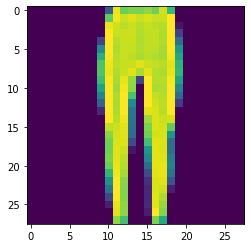

In [ ]:
# Try out: 
target = np.random.choice(np.where(y_train == 1)[0])
X_train[target].shape
plt.imshow(X_train[target])

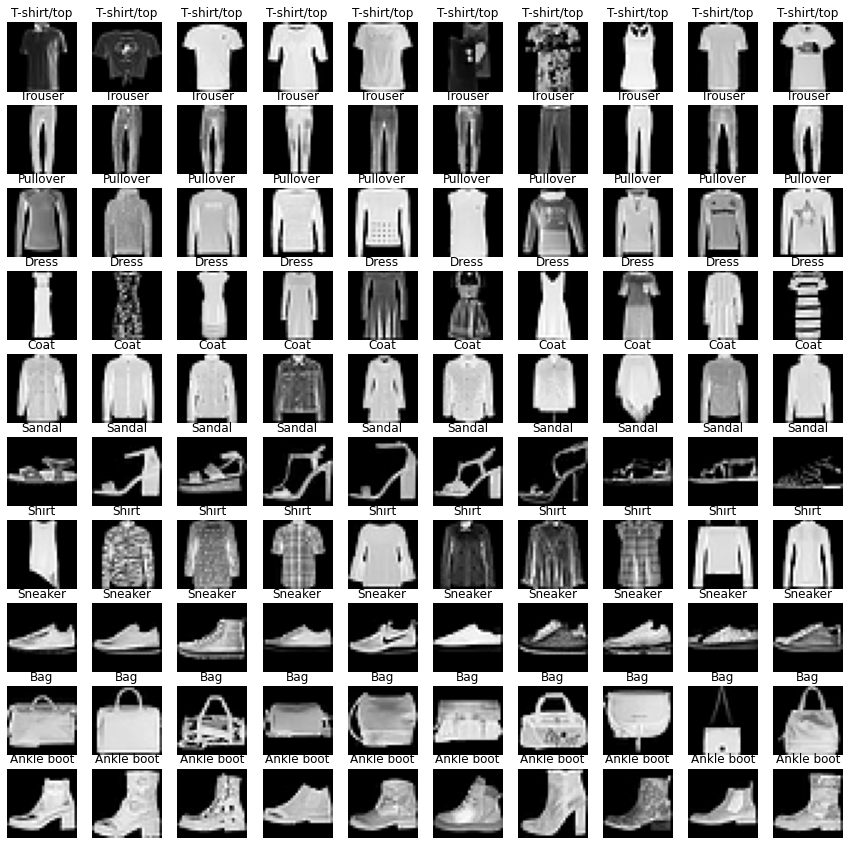

In [ ]:
fig, axs = plt.subplots(10,10) # 10 classes. Draw 10 photos/ class --> 10x10
fig.set_figheight(15)
fig.set_figwidth(15)
for i in range(10): 
  for j in range(10):
    target = np.random.choice(np.where(y_train == i)[0]) # np.where lấy ra index do y thay đổi  từ 0->9. [0] Lấy phần từ index 0 do mặc định. random.choice 1 cái thôi
    axs[i][j].grid('off') # tắt lưới trục x, y
    axs[i][j].axis('off')
    axs[i][j].imshow(np.squeeze(X_train[target]), cmap='gray') # ô show ra hình # squeeze 1, 28, 28 or 28, 28, 1 thì nó sẽ bỏ 1 đi # ko cần dùng squeez trong case này
    axs[i][j].set_title(class_names[i])

## Define CNN model

**A function help drawing Learning Curve**

In [ ]:
# TODO
# 1. complete the draw_chart() function below

def draw_chart(history):
  plt.figure(figsize=(15,8))

  plt.subplot(1,2,1)
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('Loss vs Epochs')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend(['Train', 'Validation'])
  
  plt.subplot(1,2,2)
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('Accuracy vs Epochs')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend(['Train', 'Validation'])

Recall that our data shape is (num_of_samples, 28, 28) but Conv2D layer expect input is a 3D tensor, we have to convert our data to 3D

**Solution**

Reshape data from (28,28) to (28,28,1)

Kest thì 28, 28, 1. Library khác thì 1, 28, 28

In [ ]:
# TODO
# 1. Reshape data
X_train = X_train[..., None]
X_val = X_val[..., None]
X_test = X_test[..., None]

**Create your CNN model**

In [ ]:
# TODO
from tensorflow.keras.layers import Conv2D, Input
from tensorflow.keras.models import Model

def create_cnn_block(layer, filters, k_size):
    layer = Conv2D(filters, k_size, padding='same', activation='relu')(layer) # padding mặc định trên hàm bao nhiều để padding vào trong hàm luôn, dòng này chỉ để padding=padding
    layer = MaxPooling2D()(layer)
    return layer

input = Input(shape=X_train.shape[1:])
cov_block_1 = create_cnn_block(input, 32, 3)
cov_block_2 = create_cnn_block(cov_block_1, 64, 3)
cov_block_3 = create_cnn_block(cov_block_2, 64, 3) # ---> nếu muốn giảm 1tr630 xuống thì thêm cov block 3
dense = Flatten()(cov_block_3)
dense = Dense(512, activation='relu')(dense)
output = Dense(10, activation='softmax')(dense)
model = Model(input, output)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 64)          36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 3, 3, 64)          0     

**Draw Learning Curve and evaluate on 3 sets**

In [ ]:
# TODO
from tensorflow.keras.callbacks import EarlyStopping
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics='accuracy')
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
tuned_history = model.fit(X_train, Y_train,
                          epochs=1000,
                          validation_data=(X_val, Y_val), 
                          batch_size=512, 
                          shuffle=True, 
                          callbacks=[early_stop]) # để sau cùng: truyền vào array        

Epoch 1/1000
98/98 [==============================] - 1s 13ms/step - loss: 0.7770 - accuracy: 0.7316 - val_loss: 0.4626 - val_accuracy: 0.8371
Epoch 2/1000
98/98 [==============================] - 1s 10ms/step - loss: 0.4159 - accuracy: 0.8525 - val_loss: 0.3725 - val_accuracy: 0.8672
Epoch 3/1000
98/98 [==============================] - 1s 10ms/step - loss: 0.3480 - accuracy: 0.8752 - val_loss: 0.3390 - val_accuracy: 0.8800
Epoch 4/1000
98/98 [==============================] - 1s 10ms/step - loss: 0.3193 - accuracy: 0.8854 - val_loss: 0.3071 - val_accuracy: 0.8904
Epoch 5/1000
98/98 [==============================] - 1s 10ms/step - loss: 0.2963 - accuracy: 0.8954 - val_loss: 0.2843 - val_accuracy: 0.8971
Epoch 6/1000
98/98 [==============================] - 1s 10ms/step - loss: 0.2752 - accuracy: 0.9004 - val_loss: 0.2863 - val_accuracy: 0.8947
Epoch 7/1000
98/98 [==============================] - 1s 10ms/step - loss: 0.2653 - accuracy: 0.9042 - val_loss: 0.2781 - val_accuracy: 0.8992

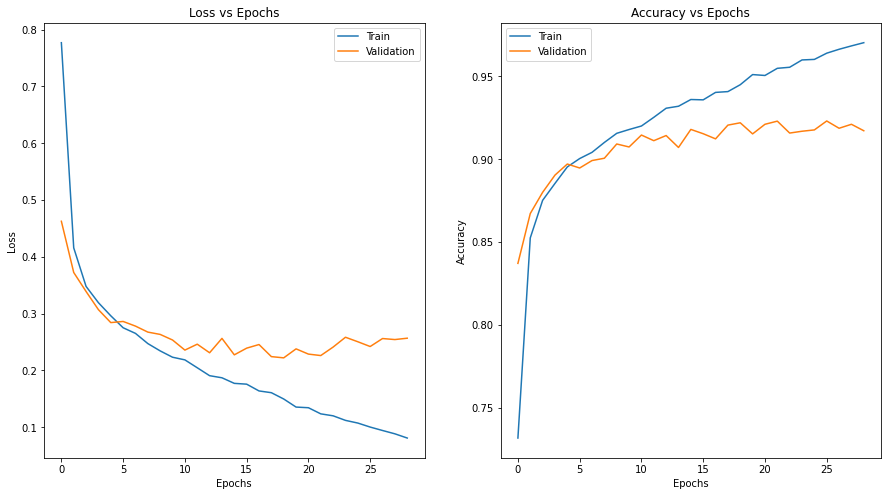

In [ ]:
draw_chart(tuned_history)

In [ ]:
# Accuracy đẹp hơn Assignment 7
# Cũ: tới epochs 35
# Mới tới epochs 30

In [ ]:
y_pred = model.predict(X_test)
print('y_pred shape: ', y_pred.shape)
print(y_pred)

y_pred shape:  (10000, 10)
[[3.68613001e-07 2.12046769e-11 4.27100311e-08 ... 3.84357758e-04
  2.92235973e-06 9.99231696e-01]
 [1.35147729e-05 6.30789714e-08 9.99919891e-01 ... 2.41150372e-12
  1.44335772e-07 5.16971299e-10]
 [2.10430118e-09 1.00000000e+00 2.69764033e-09 ... 3.31053139e-16
  3.66358090e-11 1.21566363e-14]
 ...
 [2.25665735e-06 5.60270060e-11 1.32986643e-05 ... 2.58624011e-09
  9.99846578e-01 1.92110855e-10]
 [2.57297614e-07 9.99998450e-01 5.33975921e-08 ... 7.92301016e-11
  6.85724588e-09 7.77804754e-09]
 [8.58860963e-04 2.98462965e-07 6.76800671e-04 ... 1.15409024e-01
  4.75070551e-02 7.41551048e-04]]


In [ ]:
print(np.argmax(y_pred, axis=1).shape) # lấy số max rồi lấy index của nó 

(10000,)


In [ ]:
# Làm sao in ra index của hình sai